# Modular CerberusTS Experimentation

In [1]:
import os
os.chdir("..")

In [2]:
from cerberus_ts import Cerberus, train_cerberus
from cerberus_ts import TimeseriesDataPreparer, ResponseGenerator
import pandas as pd

c:\Users\johnm\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv(r"data/jena_climate_2009_2016.csv",
                parse_dates=['Date Time'], 
                index_col=['Date Time'])
df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S')
df = df.iloc[:5000,:]

In [4]:
thresholds = {
    'call': 1,
    'response': 1,
    'context_0': 1,
    'context_1': 1,
    'context_2': 1
}

sizes = {
    'call': 24,
    'response': 8,
    'context_0': 24,
    'context_1': 12,
    'context_2': 6
}

window_timesteps = {
    'call': '10T',
    'response': '10T',
    'context_0': '1H',
    'context_1': '2H',
    'context_2': '6H'
}

window_sizes = {
    'call': 24,
    'response': 8,
    'context_0': 24,
    'context_1': 12,
    'context_2': 6
}

feature_indexes = {
    'call': range(0,14),
    'response': [0, 1, 4],
    'context_0': range(0,14),
    'context_1': range(0,14),
    'context_2': range(0,14)   
}

In [5]:
# Initialize the preparer
preparer = TimeseriesDataPreparer(df, sizes, thresholds, feature_indexes, window_timesteps, train_len = 20_000, feature_range = [0, 1])

# Prepare the data
preparer.prepare_data()

In [6]:
model = Cerberus(sizes, feature_indexes)

In [7]:
model = train_cerberus(model, preparer.dataloaders, num_epochs = 60)

Epoch [1/60], Loss: 0.005664000638838236
Epoch [2/60], Loss: 0.0013577502934883038
Epoch [3/60], Loss: 0.0011228456220123916
Epoch [4/60], Loss: 0.001020649583855023
Epoch [5/60], Loss: 0.0009944773835983748
Epoch [6/60], Loss: 0.000952036033074061
Epoch [7/60], Loss: 0.0008969712036196142
Epoch [8/60], Loss: 0.0009044995704122509
Epoch [9/60], Loss: 0.0008706694874369229
Epoch [10/60], Loss: 0.0008796893176622689
Epoch [11/60], Loss: 0.0008594143014245977
Epoch [12/60], Loss: 0.0008418924846531203
Epoch [13/60], Loss: 0.000831047761021182
Epoch [14/60], Loss: 0.0007960393887090807
Epoch [15/60], Loss: 0.0008062189351767301
Epoch [16/60], Loss: 0.0007869870269981524
Epoch [17/60], Loss: 0.0007735817437060177
Epoch [18/60], Loss: 0.0007576313054111476
Epoch [19/60], Loss: 0.0007447587308706716
Epoch [20/60], Loss: 0.0007516349205980077
Epoch [21/60], Loss: 0.0007358511748801296
Epoch [22/60], Loss: 0.000713370027175794
Epoch [23/60], Loss: 0.0007119961325467253
Epoch [24/60], Loss: 0.00

          0         1         2
0  0.887617  0.668515  0.670253
1  0.888212  0.668537  0.673211
2  0.888782  0.669200  0.675265
3  0.889708  0.670063  0.675794
4  0.891014  0.670141  0.675155
5  0.892676  0.668461  0.675494
6  0.894336  0.666102  0.678046
7  0.895470  0.664678  0.682708
8  0.896445  0.662977  0.686477


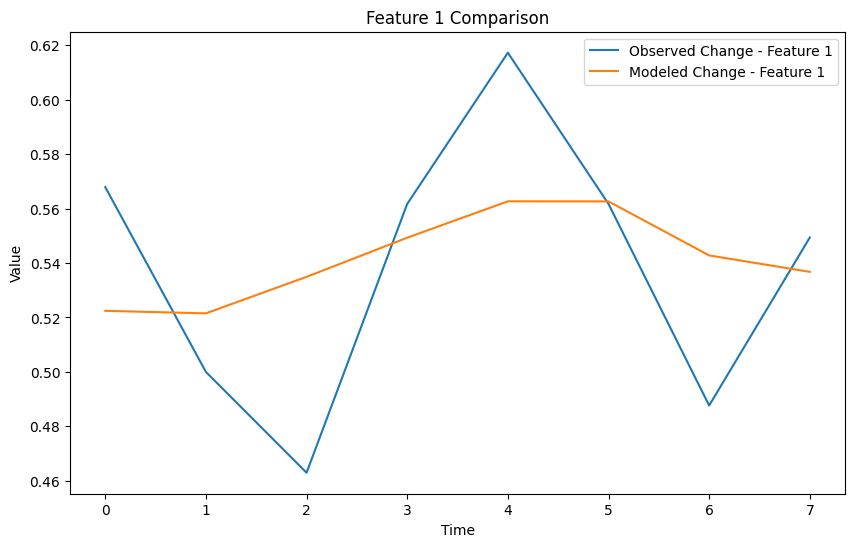

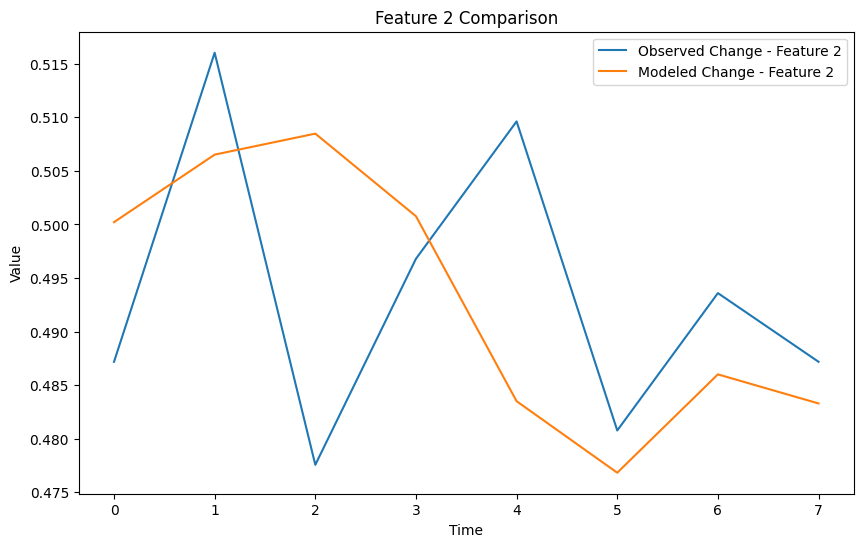

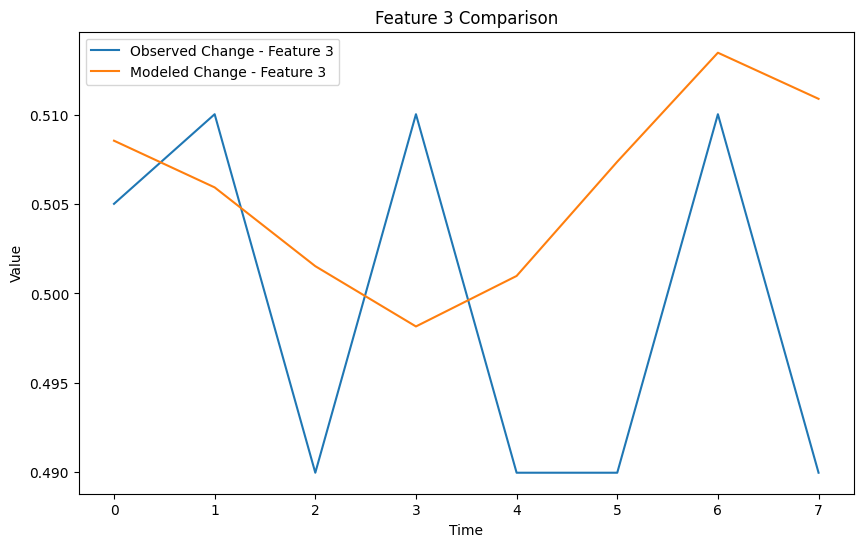

In [22]:
# Intialize Response Generator
generator = ResponseGenerator(model, preparer.sliced_data, feature_indexes, preparer.max_change_dfs)

# Generate a response for a specific index
sel_index = 4000
generator.generate_response(sel_index)

print(generator.denormalized_response)
generator.plot_normalized_responses()

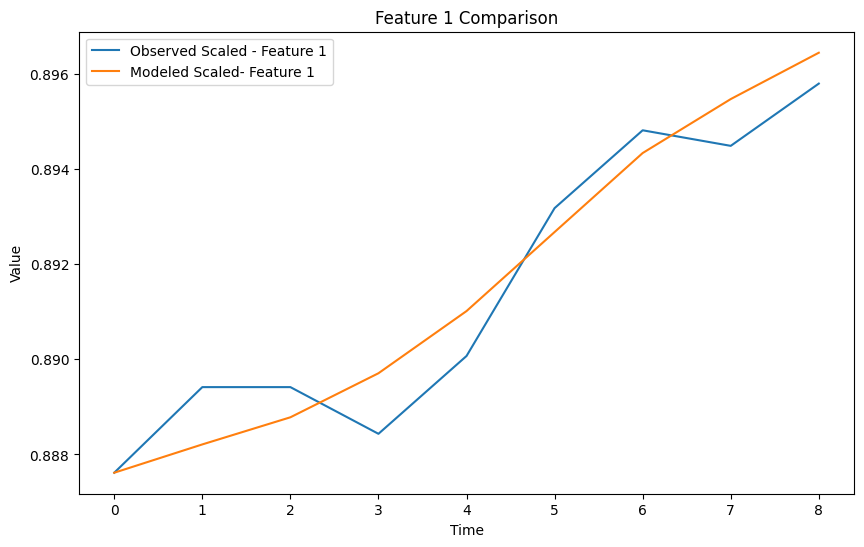

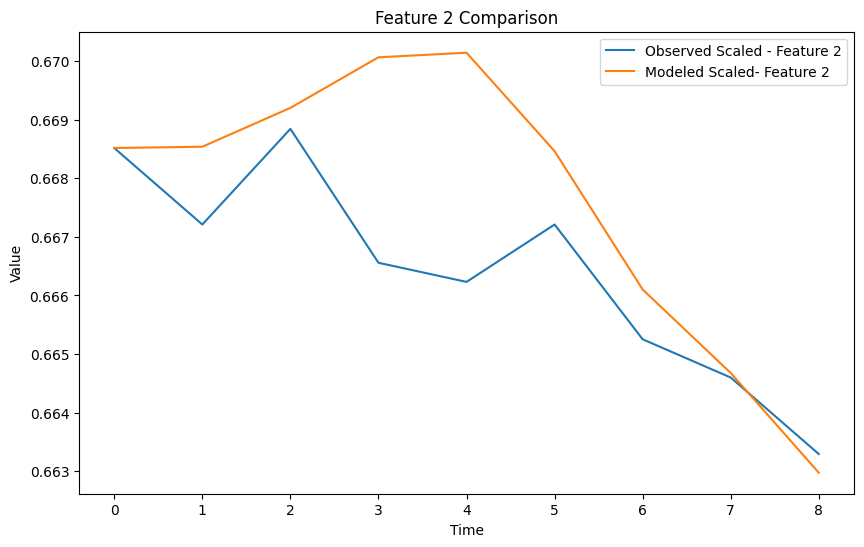

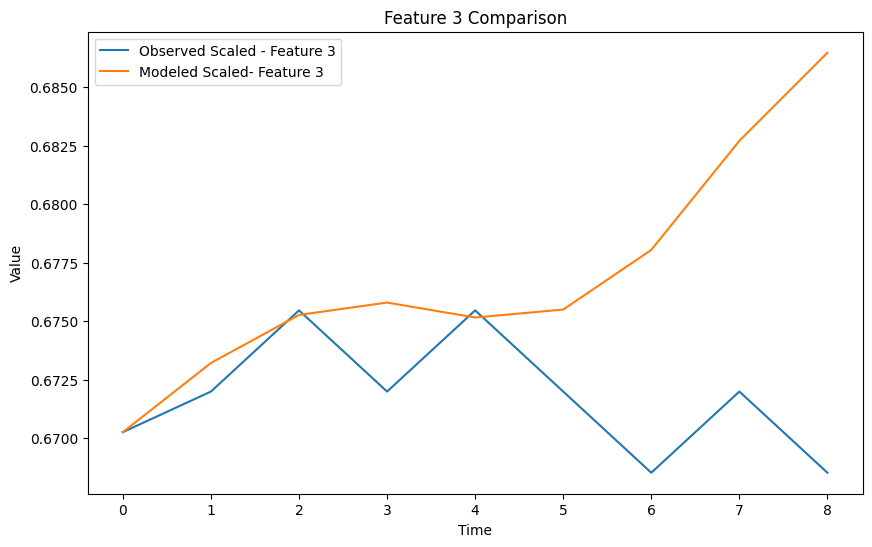

In [23]:
generator.plot_denormalized_responses()